# Singular Value Decomposition

Here we will study various uses for the singular value decomposition (SVD).

## Initialization

In [1]:
import numpy as np
# It is convenient to not have the plots inlined for this example
# so you can only see the plots if you run this yourself!
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.linalg as la

In the `scipy.linalg` module there are a number of functions for working with or using the singular value decomposition. To perform the decomposition we use `scipy.linalg.svd` (though also see `scipy.linalg.diagsvd` for using the results of the decomposition).  The use of keyword `full_matrices` will be discussed below.

In [ ]:
la.svd?

There are also two functions or calculating the pseudo-inverse of a matrix, `scipy.linalg.pinv` and `scipy.linalg.pinv2`.  They use different techniques, in particular `pinv2` uses the singular value decomposition.

In [ ]:
la.pinv?

In [ ]:
la.pinv2?

## Linearly Dependent System of Equations

$\def\mat#1{\textsf{#1}}$
To being let us consider the linear system of equations

$$\begin{align}
3x + y - 6z &= -10, \\
2x + y - 5z &= -8, \\
6x - 3y +3z &= 0.
\end{align} $$

This system of equations can be written in the matrix form $\mat A\vec x=\vec b$ where

$$
\mat A = \left( \begin{array}{rrr}
3 & 1 & -6 \\
2 & 1 & -5 \\
6 & -3 & 3
\end{array} \right)
\quad\mathrm{and}\quad
\vec b = \left( \begin{array}{rrr} -10 \\ -8 \\ 0 \end{array} \right).
$$

Let us first check that the arrays returned by `la.svd` allow us to correctly reconstruct $\mathsf{A}$.

In [2]:
A = np.array([ [3., 1, -6], [2, 1, -5], [6, -3, 3] ])
b = np.array([-10., -8, 0])

(U, S, VT) = la.svd(A)

print('U =\n', U)
print('S =\n', S)
print('VT =\n', VT)

print('U S VT =\n', U @ np.diag(S) @ VT)

U =
 [[-0.74720208  0.22912848 -0.62385029]
 [-0.61461836  0.11889561  0.77981287]
 [ 0.2528504   0.96610764  0.05198752]]
S =
 [8.80056246e+00 7.24914480e+00 1.90252980e-16]
VT =
 [[-0.22200179 -0.24093592  0.94480955]
 [ 0.92725731 -0.35180686  0.12816326]
 [ 0.30151134  0.90453403  0.30151134]]
U S VT =
 [[ 3.  1. -6.]
 [ 2.  1. -5.]
 [ 6. -3.  3.]]


This behaves as expected. Now, note that this system of linear equations is not linearly independent.  This means the matrix $\mat A$ is singular.  To see this we can look for a zero the determinant, eigenvalue(s), or singular value(s) of the matrix.

In [3]:
lam = la.eigvals(A)
S = la.svdvals(A)

print("Determinant:\n", la.det(A))
print("Eigenvalues:\n", lam)
print("Singular values:\n", S)

Determinant:
 2.0816681711721685e-15
Eigenvalues:
 [-2.75114274e-18+0.j          3.50000000e+00+4.66368953j
  3.50000000e+00-4.66368953j]
Singular values:
 [8.80056246e+00 7.24914480e+00 1.90252980e-16]


We see that numerically the determinant is zero and both one of the eigenvalues and singular values is zero.  This means the matrix is singular so it is not invertible and there is not a unique solution to the system of equations.

The complete solution to this system of equations can be found using a singular value decomposition.

### Particular Solution

Let $\vec x_p$ be a particular solution of the system of linear equations so that $\mat A\vec x_p=\vec b$.  Using the singular value decomposition $\mat A = \mat U\mat S\mat V^T$ we can rewrite this system of equation as

$$
\mat S \vec x_p' = \vec b', \quad\mathrm{where}\quad
\begin{cases}
      \vec x_p' = \mat V^T\vec x_p,\\
      \vec b' = \mat U^T\vec b
\end{cases}
$$

Since $\mat S$ is diagonal we can easily solve for $\vec x_p'$ with the extra condition that we set the components of $\vec x_p'$ to zero where the singular values are zero (or sufficiently small for numerical purposes).  From this we can then find the particular solution as $\vec x_p = \mat V\vec x_p'$.

In [4]:
(U, S, VT) = la.svd(A)

# b' = U^T b
bp = U.T @ b

# x_p = V S^-1 b
xp = VT.T @ (bp / S) # S is just a vector, not the full matrix, so plain division works

print("Particular solution:\n", xp)
print("A @ xp:\n", A @ xp)
print("b:\n", b)
print("Actually a solution?", np.allclose(A@xp, b))

Particular solution:
 [0.68030507 4.0409152  2.68030507]
A @ xp:
 [-1.00000000e+01 -8.00000000e+00  3.55271368e-15]
b:
 [-10.  -8.   0.]
Actually a solution? True


### Null Vectors

For every zero singular value of $\mat A$ there is a vector, $\vec z$, for which $\mat A\vec z=0$.  This vector, multiplied by any number, can always be added to the particular solution $\vec x_p$.  These null vectors are contained in the **columns** of $\mat V$ corresponding to the zero singular values.  Notice that the singular value decomposition produces $\mat V^T$ so the null vectors will be contained in the **rows** of $\mat V^T$ that correspond to the singular values.

For our system there is a one zero singular value so we will access it directly (in practice we should use the `where` command or Boolean arrays to slice the appropriate rows from `VT`).

In [5]:
z = VT[-1] # Last row is a null vector for our example
print("z:\n", z)
print("A @ z:\n", np.dot(A,z))
print("z a null vector?", np.allclose(A@z, np.zeros(len(z))))

z:
 [0.30151134 0.90453403 0.30151134]
A @ z:
 [4.44089210e-16 4.44089210e-16 6.66133815e-16]
z a null vector? True


### General Solution

The general solution is constructed from the above results as
$$ \vec x = \vec x_p + \alpha \vec z, $$
where $\alpha$ is any real number.

We will verify this in a couple of cases.

In [6]:
alpha = 2 # Simple value
x = xp + alpha*z
print("For alpha={}, A @ x = {}".format(alpha, A@x))
# Try random value of alpha
alpha = 10*np.random.randn(1)[0]
x = xp + alpha*z
print("For alpha={}: A x = {}".format(alpha, A@x))

For alpha=2, A @ x = [-1.00000000e+01 -8.00000000e+00  5.32907052e-15]
For alpha=-17.290234829708318: A x = [-1.00000000e+01 -8.00000000e+00 -1.33226763e-14]


### Pseudo-Inverse

The matrix $\mat A$ is not invertible but we can calculate the pseudo-inverse.  We can do this directly or using the functions `pinv` and `pinv2`.  Let us compare all these methods.

In [7]:
# Invert S, compare this to how we found the particular solution above.
# Here we calculate the inverse carefully to avoid dividing by zero at any point.

Sinv = np.zeros_like(S)
ind = S > 1e-14*S.max()
Sinv[ind]= 1./S[ind]

Apinv_svd = np.dot(VT.T, np.dot(np.diag(Sinv), U.T))
Apinv = la.pinv(A)
Apinv2 = la.pinv2(A)

print("SVD inverse = pinv? ", np.allclose(Apinv_svd, Apinv))
print("SVD inverse = pinv2?", np.allclose(Apinv_svd, Apinv2))

SVD inverse = pinv?  True
SVD inverse = pinv2? True


We can test the relations for pseudoinverses,
$$ \mat A\mat A^{-1}\mat A = \mat A \quad\mathrm{and}\quad
\mat A^{-1} \mat A\mat A^{-1} = \mat A^{-1}. $$
These should be satisfied.

In [8]:
print("A Ainv A = A?      ", np.allclose(np.dot(A, np.dot(Apinv_svd,A)), A))
print("Ainv A Ainv = Ainv?", np.allclose(np.dot(Apinv_svd, np.dot(A, Apinv_svd)), Apinv_svd))

A Ainv A = A?       True
Ainv A Ainv = Ainv? True


## Intersection of Two Planes

The problem we solved above is the same as finding the intersection between two planes.  Provided the two planes are not parallel they will intersect along a line and we can use a singular value decomposition to find this line.

Consider two planes given by the equations

$$ \begin{align}
x - z &= -2, \\
x - y + 2z &= 2.
\end{align} $$

This is in fact the same system studied above.
We can write this in the matrix form $\mat A\vec x=\vec b$ where

$$\mat A = \left( \begin{array}{rrr}
1 & 0 & -1 \\
1 & -1 & 2
\end{array} \right)
\quad\mathrm{and}\quad
\vec b = \left( \begin{array}{r} -2 \\ 2 \end{array} \right). $$

Written this way, clearly there is not a unique solution since there are only two equations for three unknowns. Here we will need to understand the output of SVD routines for matrices that are not square.

### 3D Plots

Matplotlib can handle basic 3d plots so let us generate one showing the planes and their intersection.  Our goal is to find the line that describes the intersection.

Text(0.5,0.92,'Intersecting Planes')

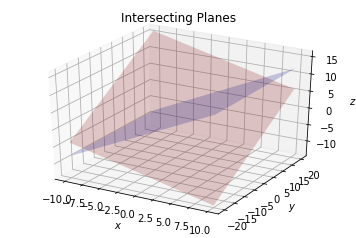

In [9]:
from mpl_toolkits.mplot3d import Axes3D # To get 3d axes
fig = plt.figure(1)
fig.clf()
ax = fig.add_subplot(111, projection='3d')
(X, Y) = np.meshgrid(np.linspace(-10,10,2), np.linspace(-20,20,2))
Z = 2 + X
ax.plot_surface(X, Y, Z, color='b', alpha=0.2)
Z = 1 - X/2 + Y/2
ax.plot_surface(X, Y, Z, color='r', alpha=0.2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.set_title('Intersecting Planes')

### Full Matrices

By default if we perform a singular value decomposition using `svd` we get full matrices for $\mat U$, $\mat S$, and $\mat V$.

In [10]:
A = np.array([[1., 0, -1], [1, -1, 2]])
b = np.array([-2., 2])
(Ufull, Sfull, VTfull) = la.svd(A)
print("U =\n", Ufull)
print("S =\n", Sfull)
print("VT =\n", VTfull)

U =
 [[-0.22975292  0.97324899]
 [ 0.97324899  0.22975292]]
S =
 [2.49721204 1.32813103]
VT =
 [[ 0.29773045 -0.38973422  0.87147221]
 [ 0.90578556 -0.17298965 -0.38681662]
 [ 0.30151134  0.90453403  0.30151134]]


This may look strange, as there seems to be an extra row in $\mat V^T$. What is going on?  As we saw in the previous problem the extra row in $\mat V^T$ is a null vector.  By default `svd` constructs the full matrices by calculating and including the null vectors.  We can prevent this using the `full_matrices=False`.

In [11]:
(U, S, VT) = la.svd(A, full_matrices=False)
print('U =\n', U)
print('S =\n', S)
print('VT =\n', VT)

print('U S VT =\n', U @ np.diag(S) @ VT)

U =
 [[-0.22975292  0.97324899]
 [ 0.97324899  0.22975292]]
S =
 [2.49721204 1.32813103]
VT =
 [[ 0.29773045 -0.38973422  0.87147221]
 [ 0.90578556 -0.17298965 -0.38681662]]
U S VT =
 [[ 1.00000000e+00  1.11022302e-16 -1.00000000e+00]
 [ 1.00000000e+00 -1.00000000e+00  2.00000000e+00]]


### Particular Solution

To obtain the particular solution we can proceed as we did with the previous system of equations.  First we find the particular solution.  Notice that the zero singular value is not included in `S` so we do not need to "correct" any elements of $\vec x_p'$.  Of course now $\vec x_p'$ only has two components instead of three.

In [12]:
bp = np.dot(U.T, b)
xp = np.dot(VT.T, bp / S)
print('Particular solution =', xp)

Particular solution = [-0.72727273 -0.18181818  1.27272727]


## Null Vector

The null vectors again must be included.  Here we **need** the full matrices since, as noted above, they are precisely the rows added to $\mat V^T$ to make it a square matrix.  Here the null vector represents the direction along the line.

In [13]:
z = VTfull[-1]
print('Null vector =', z)

Null vector = [0.30151134 0.90453403 0.30151134]


### Line of Intersection

The line giving the intersection between the two planes is just the general solution
$$ \vec x = \vec x_p + \alpha \vec z. $$

Again we can verify this is the solution to the linear system.

In [14]:
alpha = -3 # arbitrary value
print('Solution?', np.allclose(np.dot(A, xp+alpha*z), b))

Solution? True


Finally, add the line to the figure.  We should see it runs along the intersection of the planes. (Since I am being "clever" this only works when **not** plotting inline.  We could reproduce the full figure with this extra line included, but I will make you run the example yourself to see the full figure).

In [ ]:
alpha = np.linspace(-12, 12, 2)
# One use of broadcasting.
x = xp[:,None] + alpha[None,:] * z[:,None]
ax.plot(x[0], x[1], x[2], 'k-', lw=2)
ax.set_xlim(-10,10) # Otherwise x limits change.
fig.show()